In [2]:
import subprocess

device = "mps"
partitioning = ("small_balanced", "small_random", "mid_balanced", "mid_random", "large_balanced", "large_random")
algorithms = ("fedavg", "fedprox")

outputs = {p: {a: None for a in algorithms} for p in partitioning}

for partition in partitioning:
    for alg in algorithms:
        command = f"python experiments.py --dataset=clinical --device={device} --comm_round=30 --n_parties=20 --partition={partition} --alg={alg}"
        print(f"Executing `{command}`")
        process = subprocess.Popen(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        _, output = process.communicate()
        outputs[partition][alg] = output

Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=small_balanced --alg=fedavg`
Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=small_balanced --alg=fedprox`
Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=small_random --alg=fedavg`
Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=small_random --alg=fedprox`
Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=mid_balanced --alg=fedavg`
Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=mid_balanced --alg=fedprox`
Executing `python experiments.py --dataset=clinical --device=mps --comm_round=30 --n_parties=20 --partition=mid_random --alg=fedavg`
Executing `python experiments.py --dataset=clinica

In [3]:
import re


def extract_test_history(outputs_: dict[int, dict[str, bytes]]) -> dict[
    str, dict[int, dict[str, list[float]]]]:
    result = {p: {a: {"gmean": [], "acc": []} for a in algorithms} for p in
              partitioning}
    regex_acc = ">> Test accuracy \| gmean:     (\d+\.\d+) \| \d+\.\d+"
    regex_gmean = ">> Test accuracy \| gmean:     \d+\.\d+ \| (\d+\.\d+)"
    for partition in partitioning:
        for alg in algorithms:
            snippet = outputs_[partition][alg].decode().split("in comm round:")
            for subsnippet in snippet[1:]:
                for metric, regex in zip(("gmean", "acc"), (regex_gmean, regex_acc)):
                    result[partition][alg][metric].append(
                        re.findall(
                            regex,
                            subsnippet
                        )
                    )
    return result

In [4]:
history = extract_test_history(outputs)

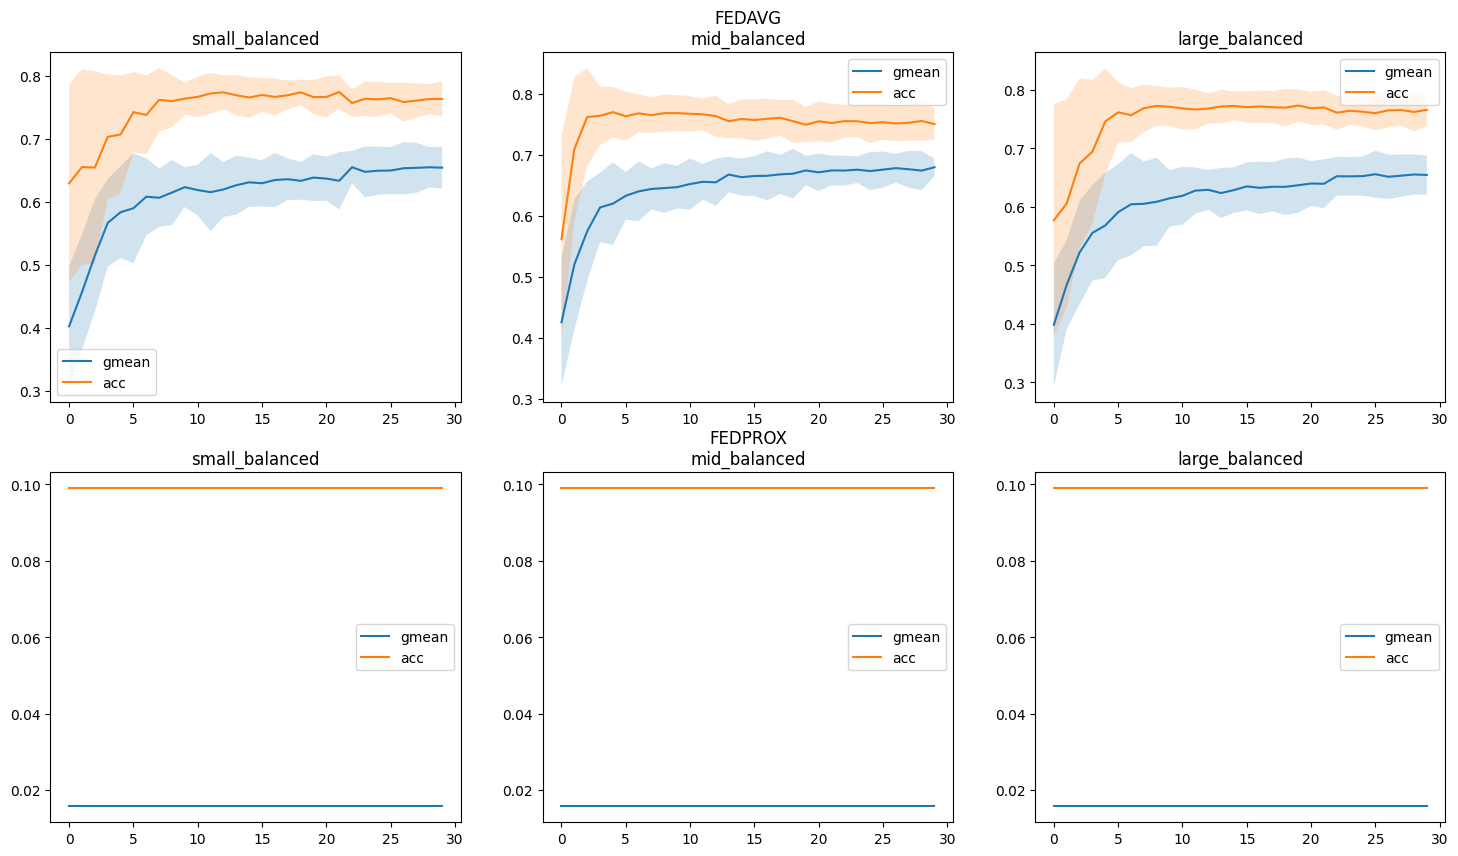

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(18, 10))

for i, partition in enumerate(("small_balanced", "mid_balanced", "large_balanced")):
    for j, alg in enumerate(("fedavg", "fedprox")):
        for metric in ("gmean", "acc"):
            hist = np.array(history[partition][alg][metric]).astype(float)
            mean = np.mean(hist, axis=1)
            std = np.std(hist, axis=1)

            ax[j][i].plot(mean, label=f"{metric}")
            ax[j][i].fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.2)
            ax[j][i].set_title(((alg.upper() + "\n") if i == 1 else "") + partition)
            ax[j][i].legend()

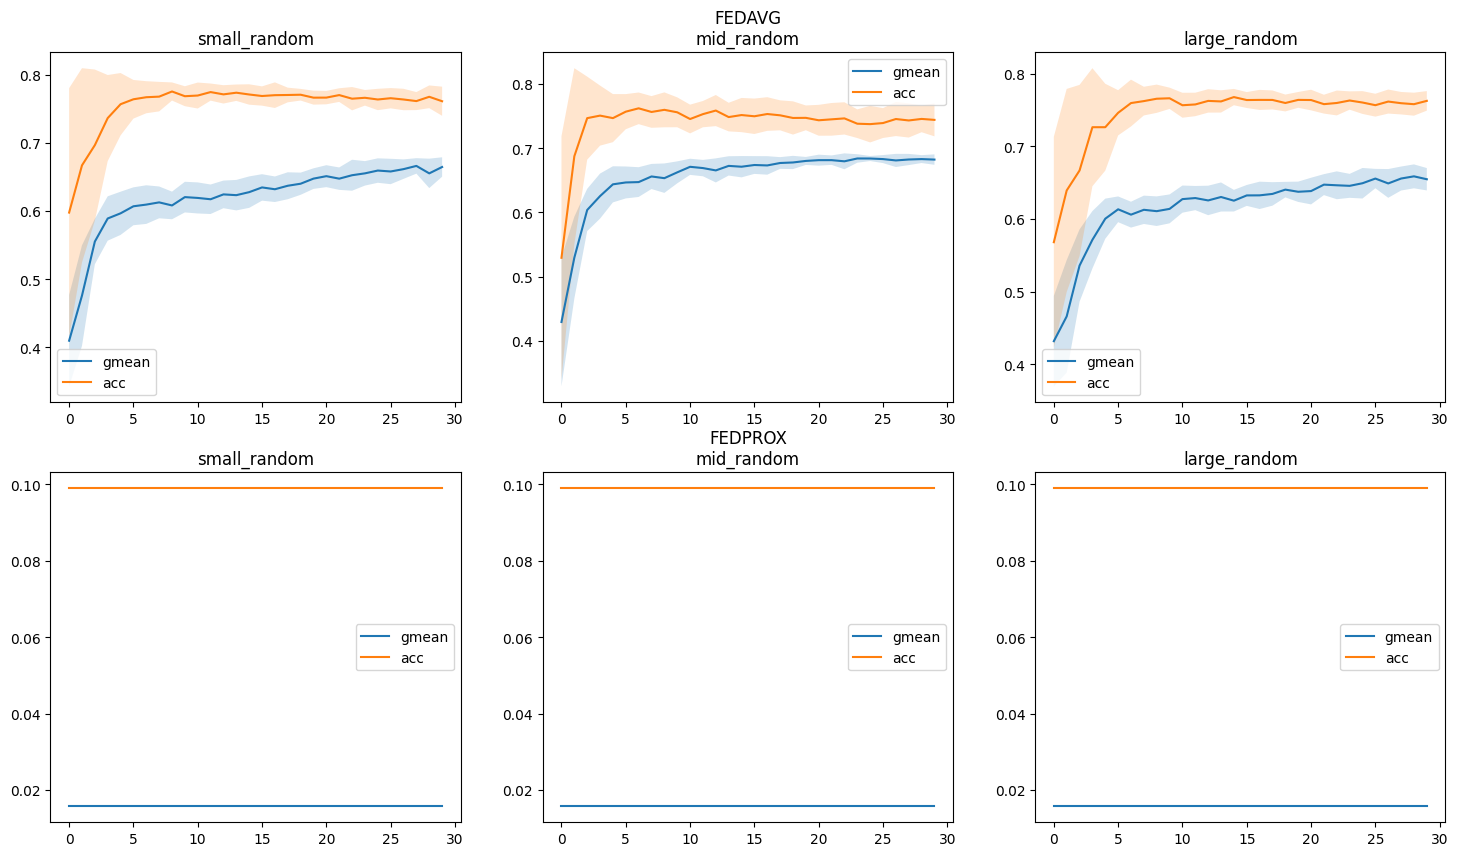

In [52]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(18, 10))

for i, partition in enumerate(("small_random", "mid_random", "large_random")):
    for j, alg in enumerate(("fedavg", "fedprox")):
        for metric in ("gmean", "acc"):
            hist = np.array(history[partition][alg][metric]).astype(float)
            mean = np.mean(hist, axis=1)
            std = np.std(hist, axis=1)

            ax[j][i].plot(mean, label=f"{metric}")
            ax[j][i].fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.2)
            ax[j][i].set_title(((alg.upper() + "\n") if i == 1 else "") + partition)
            ax[j][i].legend()

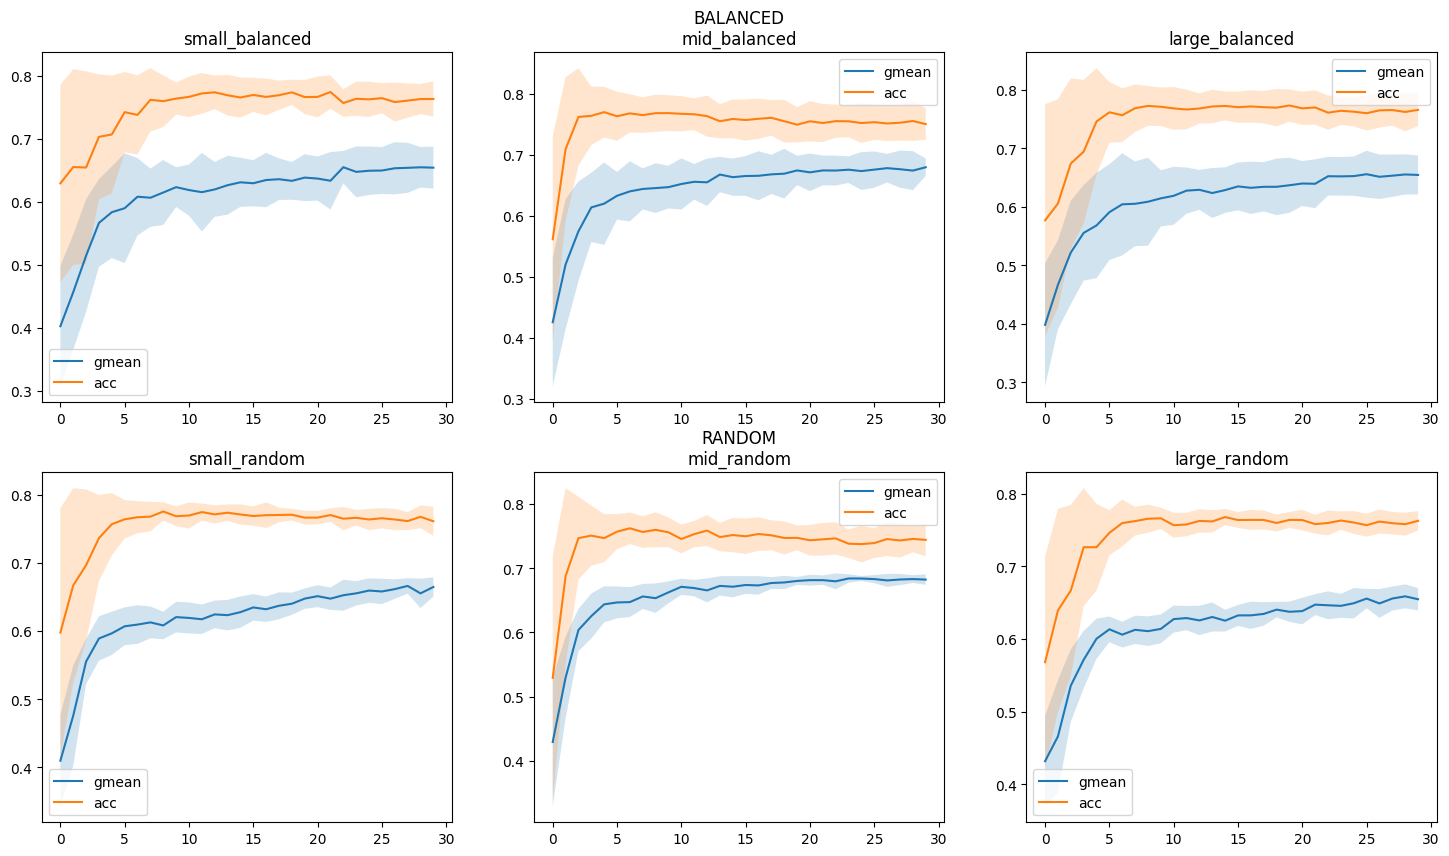

In [53]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(18, 10))

for i, partition in enumerate(("small_balanced", "mid_balanced", "large_balanced")):
    for metric in ("gmean", "acc"):
        hist = np.array(history[partition]["fedavg"][metric]).astype(float)
        mean = np.mean(hist, axis=1)
        std = np.std(hist, axis=1)

        ax[0][i].plot(mean, label=f"{metric}")
        ax[0][i].fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.2)
        ax[0][i].set_title((("BALANCED" + "\n") if i == 1 else "") + partition)
        ax[0][i].legend()

for i, partition in enumerate(("small_random", "mid_random", "large_random")):
    for metric in ("gmean", "acc"):
        hist = np.array(history[partition]["fedavg"][metric]).astype(float)
        mean = np.mean(hist, axis=1)
        std = np.std(hist, axis=1)

        ax[1][i].plot(mean, label=f"{metric}")
        ax[1][i].fill_between(np.arange(len(mean)), mean - std, mean + std, alpha=0.2)
        ax[1][i].set_title((("RANDOM" + "\n") if i == 1 else "") + partition)
        ax[1][i].legend()